In [1]:
import sys
sys.path.insert(1, '/Users/ethanfuerst/Documents/Coding/nba-figures')
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import datetime
from nba_player import NBAPlayer
from nba_season import NBASeason
from nba_methods import make_shot_chart, shots_grouper

# https://www.tidbitstatistics.com/nba_mvp/
# Note: if reg season continues this will change

gia = NBAPlayer('giannis antetokounmpo', print_name=False)
df_g = gia.get_season(season=2019)
df_g['GAME'] = df_g.index + 1
df_g['PPM'] = round(df_g['PTS']/df_g['MIN'], 2)
df_g['OPP'] = df_g['MATCHUP'].apply(lambda x: x.split(' ')[2])
g_tot = gia.get_career()[gia.get_career()['Season'] == '2019-20']
bucks_green = '#00471B'

leb = NBAPlayer('lebron james', print_name=False)
df_l = leb.get_season(season=2019)
df_l['GAME'] = df_l.index + 1
df_l['PPM'] = round(df_l['PTS']/df_l['MIN'], 2)
df_g['OPP'] = df_l['MATCHUP'].apply(lambda x: x.split(' ')[2])
l_tot = leb.get_career()[leb.get_career()['Season'] == '2019-20']
lakers_purple = '#552583'

# LeBron ends in _l, Giannis in _g
merged = pd.merge(df_g, df_l, how='outer', on='GAME', suffixes=('_g', '_l'))


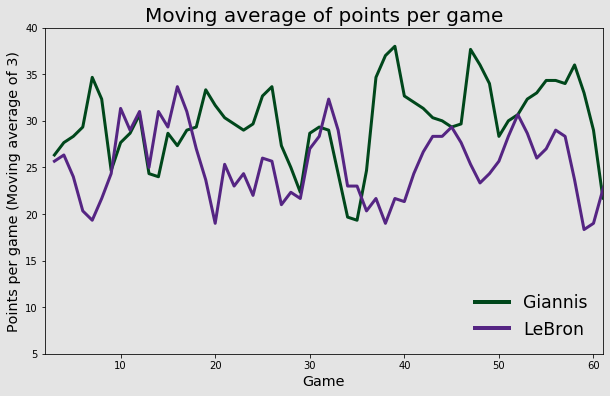

In [2]:
fig, ax = plt.subplots(facecolor='#E4E4E4')
fig.patch.set_facecolor('#E4E4E4')
fig.set_size_inches(10,6, forward=True)
ax.patch.set_facecolor('#E4E4E4')
merged['PTS_g_rolling'] = merged['PTS_g'].rolling(window=3).mean()
merged['PTS_l_rolling'] = merged['PTS_l'].rolling(window=3).mean()
plt.plot(merged['GAME'], merged['PTS_g_rolling'], color=bucks_green, linewidth=3)
plt.plot(merged['GAME'], merged['PTS_l_rolling'], color=lakers_purple, linewidth=3)
plt.legend(loc='lower right', handles = [Line2D([0], [0], color=bucks_green, lw=4, label='Giannis'),
                                        Line2D([0], [0], color=lakers_purple, lw=4, label='LeBron')],
                                        framealpha=0, fontsize='xx-large')
plt.xlim([2, 61])
plt.ylim([5, 40])
plt.title('Moving average of points per game', fontdict={'fontsize':20})
plt.xlabel("Game", fontsize='x-large')
plt.ylabel('Points per game (Moving average of 3)', fontsize='x-large')
plt.show()

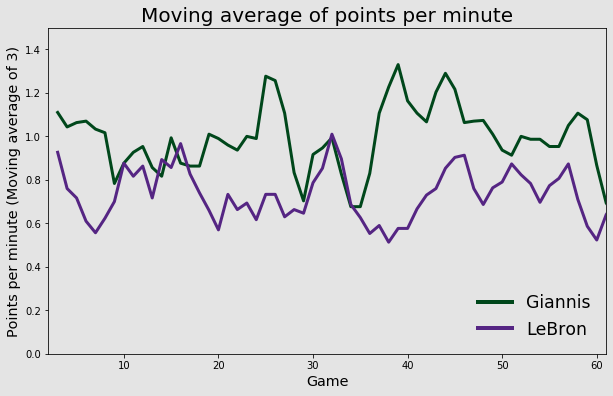

In [3]:
# Plot 2 - Points per minute
fig, ax = plt.subplots(facecolor='#E4E4E4')
fig.patch.set_facecolor('#E4E4E4')
fig.set_size_inches(10,6, forward=True)
ax.patch.set_facecolor('#E4E4E4')
merged['PPM_g_rolling'] = merged['PPM_g'].rolling(window=3).mean()
merged['PPM_l_rolling'] = merged['PPM_l'].rolling(window=3).mean()
plt.plot(merged['GAME'], merged['PPM_g_rolling'], color=bucks_green, linewidth=3)
plt.plot(merged['GAME'], merged['PPM_l_rolling'], color=lakers_purple, linewidth=3)
plt.legend(loc='lower right', handles = [Line2D([0], [0], color=bucks_green, lw=4, label='Giannis'),
                                        Line2D([0], [0], color=lakers_purple, lw=4, label='LeBron')],
                                        framealpha=0, fontsize='xx-large')
plt.xlim([2, 61])
plt.ylim([0, 1.5])
plt.title('Moving average of points per minute', fontdict={'fontsize':20})
plt.xlabel("Game", fontsize='x-large')
plt.ylabel('Points per minute (Moving average of 3)', fontsize='x-large')
plt.show()
plt.show()


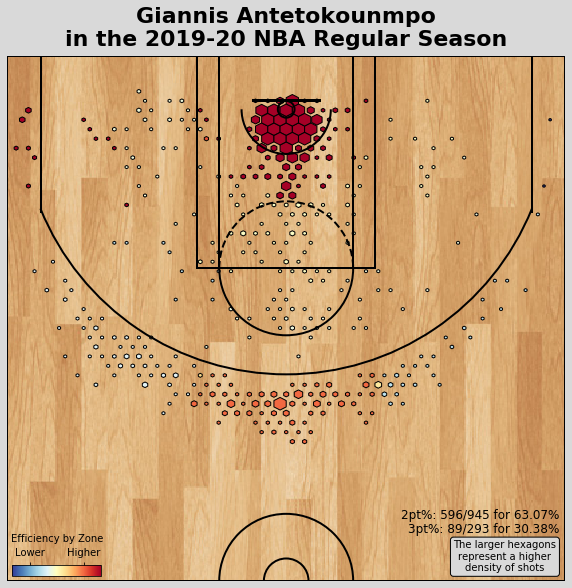

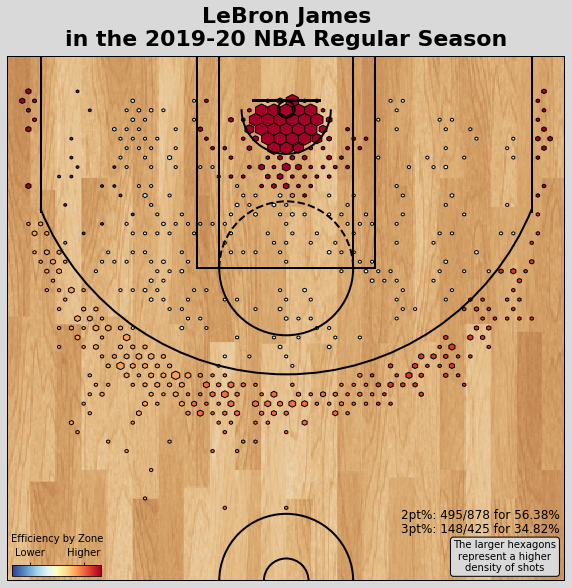

In [4]:
# Shot charts
# sc 1
df_1, fig1 = gia.get_shot_chart(seasons=[2019], chart_params={'kind':'hex', 'scale_factor':4, 'title': 'Giannis Antetokounmpo\nin the 2019-20 NBA Regular Season'})
# sc 2
df_2, fig2 = leb.get_shot_chart(seasons=[2019], chart_params={'kind':'hex', 'scale_factor':4, 'title': 'LeBron James\nin the 2019-20 NBA Regular Season'})
